# /*** Titanic Dataset Missing Values Imputation ***/

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
import matplotlib.pyplot as plt
from feature_engine.imputation import RandomSampleImputer

In [2]:
# Load Titanic dataset
df = pd.read_csv('titanic_data.csv')
titanic = df.copy()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
missing_values = df.isna().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Percentage of missing values per column
#================================================================================================
missing_percentage = df.isnull().mean() * 100
missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

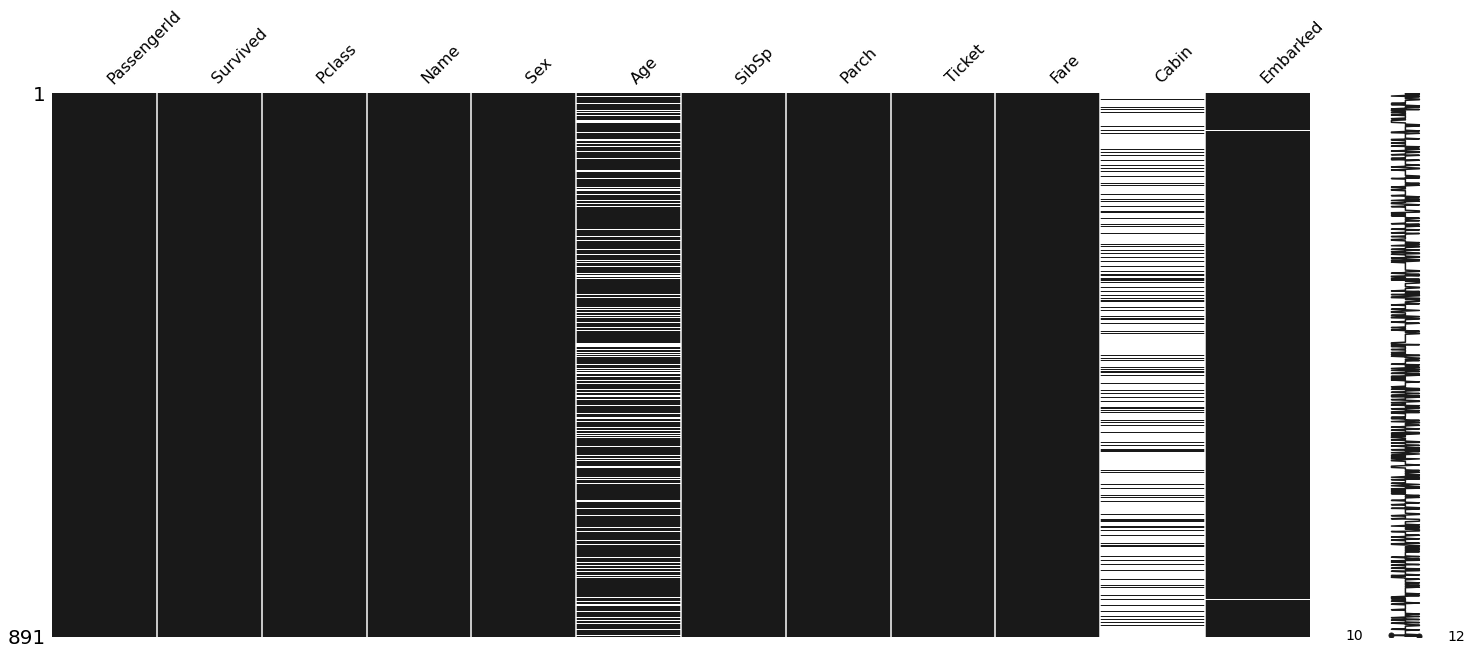

In [5]:
msno.matrix(titanic,color=(0.10, 0.10, 0.10))
plt.show()

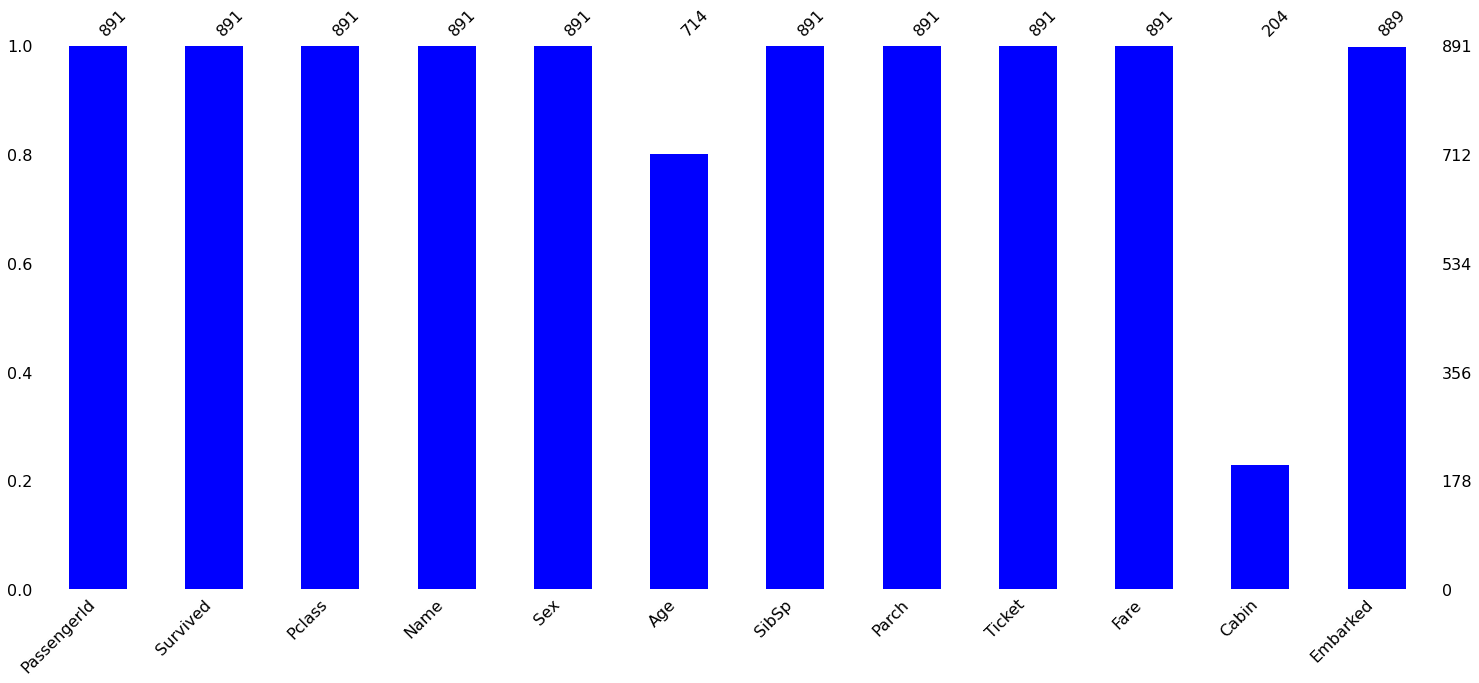

In [6]:
msno.bar(df,color=(0.00, 0.00, 1.00))
plt.show()

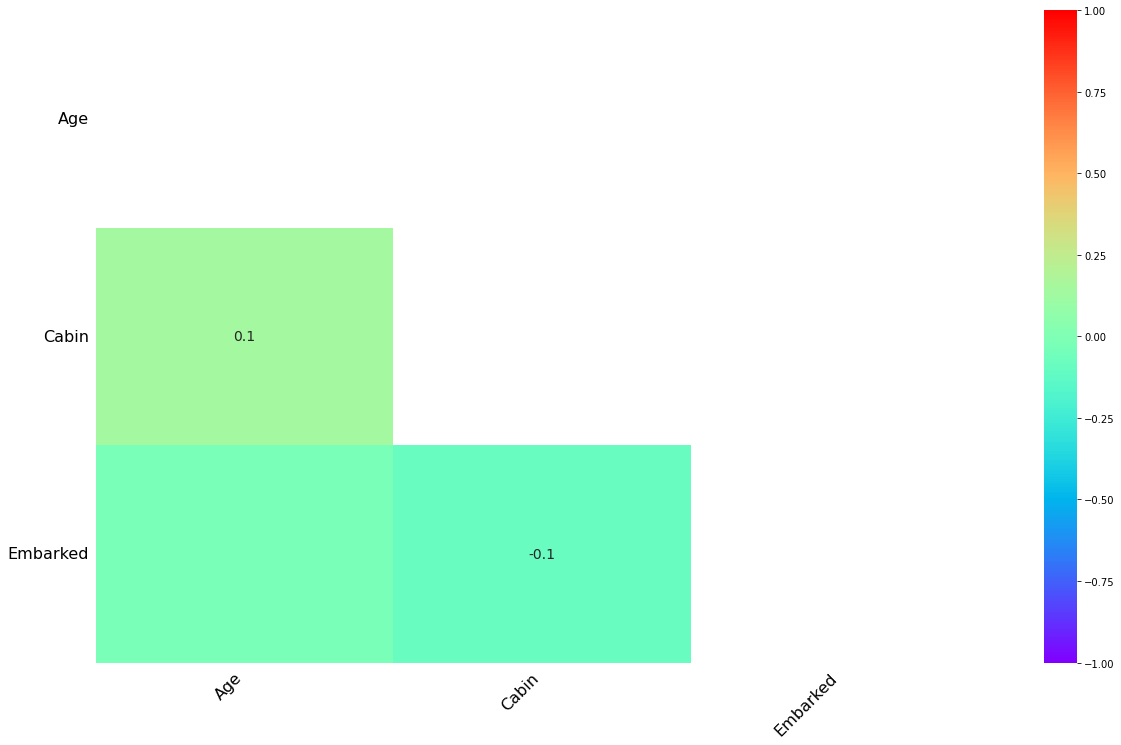

In [7]:
msno.heatmap(df,cmap = 'rainbow')
plt.show()

## list-wise deletion - Complete-case analysis (CCA)

In [8]:
titanic = df.copy()
# Complete Case Analysis - Drop rows with missing values
titanic_cca = titanic.dropna()

# Display the shape of the dataset after CCA
print(titanic_cca.shape)

(183, 12)


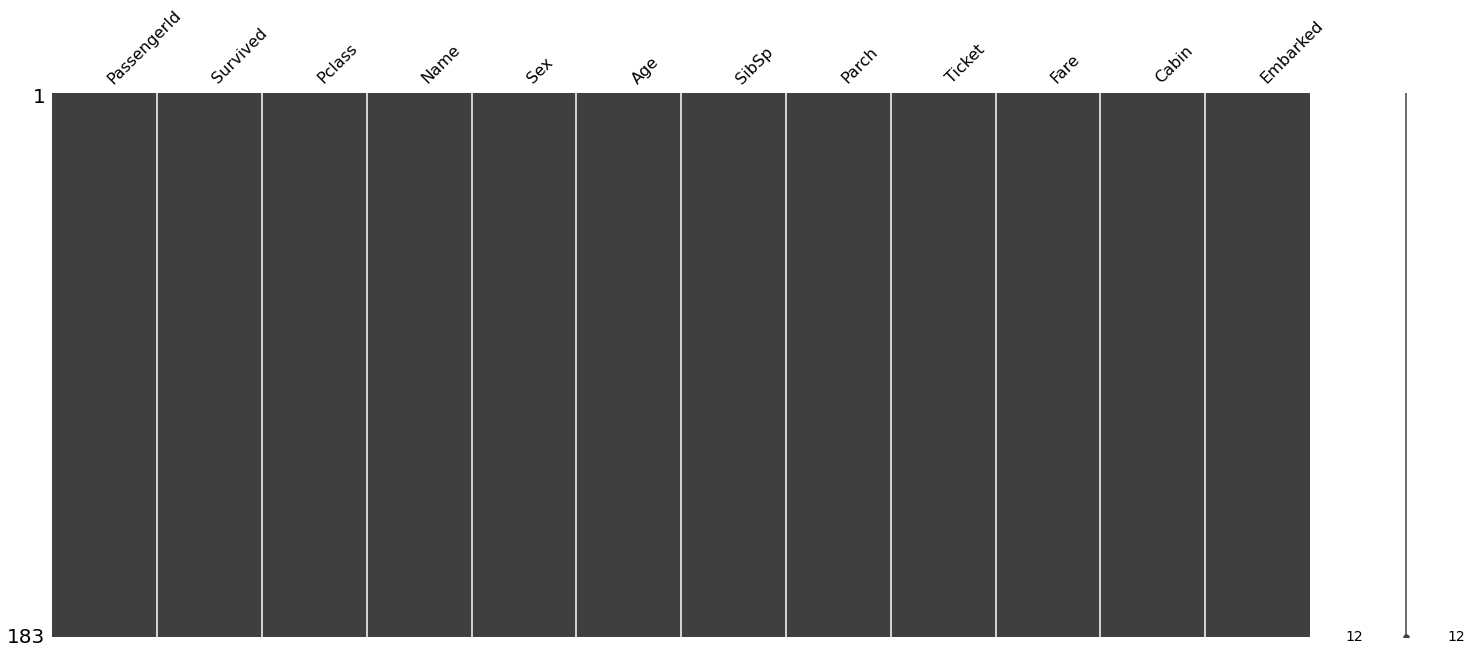

In [9]:
msno.matrix(titanic_cca,color=(0.25, 0.25, 0.25))
plt.show()

## Dropping Feature or Variable –Available-case analysis (ACA)

In [10]:
titanic = df.copy()
# Available Case Analysis - drop rows for specific columns
titanic_aca = titanic.dropna(subset=['Age', 'Embarked'])

# Display the shape of the dataset after ACA
print(titanic_aca.shape)

(712, 12)


## 1) Mean/Median/Mode Imputation

In [11]:
titanic = df.copy()
# Mean Imputation for numeric data
mean_imputer = SimpleImputer(strategy='mean')
titanic['Age_mean_imputed'] = mean_imputer.fit_transform(titanic[['Age']])

# Median Imputation for numeric data
median_imputer = SimpleImputer(strategy='median')
titanic['Age_median_imputed'] = median_imputer.fit_transform(titanic[['Age']])

In [12]:
titanic[titanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_imputed,Age_median_imputed
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,29.699118,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,29.699118,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,29.699118,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29.699118,28.0


In [13]:
titanic = df.copy()
# Mode Imputation for numeric data
print('Mode for "Age" : ', titanic['Age'].mode()[0])

titanic['Age_Mode'] = titanic['Age'].fillna(titanic['Age'].mode()[0],inplace=False)

titanic[titanic['Age'].isnull()].head()

Mode for "Age" :  24.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Mode
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,24.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,24.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,24.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,24.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,24.0


## 2) Last Observation Carried Forward (LOCF)
## 3) Next Observation Carried Backward (NOCB)

In [14]:
titanic = df.copy()
# Forward Fill
titanic['Age_FF'] = titanic['Age'].fillna(method='ffill')

# Backward Fill
titanic['Age_BF'] = titanic['Age'].fillna(method='bfill')

In [15]:
titanic[titanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_FF,Age_BF
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,35.0,54.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,2.0,31.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,31.0,35.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,38.0,19.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,19.0,40.0


In [16]:
titanic.iloc[[4,5,6,16,17,18,19,20]][['Age','Age_FF','Age_BF']]

,Age,Age_FF,Age_BF
4,35.0,35.0,35.0
5,NaN,35.0,54.0
6,54.0,54.0,54.0
16,2.0,2.0,2.0
17,NaN,2.0,31.0
18,31.0,31.0,31.0
19,NaN,31.0,35.0
20,35.0,35.0,35.0


## 4) Linear Interpolation

In [17]:
titanic = df.copy()
# Create an imputer object using linear interpolation
titanic['Age_lin_interpol'] = titanic['Age'].interpolate(method = 'linear')

# Print the dataset with imputed values
titanic.iloc[[4,5,6,16,17,18,19,20]][['Age','Age_lin_interpol']]

,Age,Age_lin_interpol
4,35.0,35.0
5,NaN,44.5
6,54.0,54.0
16,2.0,2.0
17,NaN,16.5
18,31.0,31.0
19,NaN,33.0
20,35.0,35.0


## 10) Random Sampling Imputation

In [18]:
titanic = df.copy()
# Random Sample Imputation (Hot Deck)
random_sample_imputer = RandomSampleImputer(variables=['Age'])
titanic['Age_HotDeck'] = random_sample_imputer.fit_transform(titanic[['Age']])
titanic.iloc[[4,5,6,16,17,18,19,20]][['Age','Age_HotDeck']]

,Age,Age_HotDeck
4,35.0,35.0
5,NaN,24.0
6,54.0,54.0
16,2.0,2.0
17,NaN,21.0
18,31.0,31.0
19,NaN,38.0
20,35.0,35.0


## 11) Multiple Imputation (MICE)

In [19]:
titanic = df.copy()
# Multivariate Imputation by Chained Equations (MICE) - Iterative Imputer
# MICE (Iterative Imputer)
mice_imputer = IterativeImputer()
titanic['Age_MICE'] = mice_imputer.fit_transform(titanic[['Age']])
titanic.iloc[[4,5,6,16,17,18,19,20]][['Age','Age_MICE']]

,Age,Age_MICE
4,35.0,35.000000
5,NaN,29.699118
6,54.0,54.000000
16,2.0,2.000000
17,NaN,29.699118
18,31.0,31.000000
19,NaN,29.699118
20,35.0,35.000000


## 12a) Linear regression imputation

In [20]:
from sklearn.linear_model import LinearRegression
# Select relevant features for imputation
X = titanic[['Pclass', 'SibSp', 'Parch']]
y = titanic['Age']

# Separate data into missing and non-missing subsets
X_train = X[y.notna()]  # Features where Age is not missing
y_train = y[y.notna()]  # Target (Age) where it is not missing

X_missing = X[y.isna()]  # Features where Age is missing

# Check lengths to avoid errors
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_missing shape: {X_missing.shape}")

# Ensure the number of missing values matches predictions
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
predictions = model.predict(X_missing)

# Confirm the prediction length matches the number of missing values
assert len(predictions) == len(X_missing), "Mismatch in prediction and missing data length!"

titanic['Age_lr'] = titanic['Age']
# Assign predictions back to the original dataset
titanic.loc[y.isna(), 'Age_lr'] = predictions

# Verify the result
print(titanic['Age_lr'].isna().sum())  # Should be 0 after imputation

X_train shape: (714, 3), y_train shape: (714,)
X_missing shape: (177, 3)
0


## 12b) Random Forest Imputation

In [21]:
# Select relevant features for imputation
X = titanic[['Pclass', 'SibSp', 'Parch']]
y = titanic['Age']

# Separate data into missing and non-missing subsets
X_train = X[y.notna()]  # Features where Age is not missing
y_train = y[y.notna()]  # Target (Age) where it is not missing

X_missing = X[y.isna()]  # Features where Age is missing

# Ensure no index misalignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_missing = X_missing.reset_index(drop=True)

# Check lengths to avoid errors
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_missing shape: {X_missing.shape}")

# Fit the model on non-missing values
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict missing values
predictions = rf_model.predict(X_missing)

# Ensure the prediction length matches the number of missing values
assert len(predictions) == len(X_missing), "Mismatch in prediction and missing data length!"

titanic['Age_rf'] = titanic['Age']
# Assign predictions to the missing values in the dataset
titanic.loc[titanic['Age_rf'].isna(), 'Age_rf'] = predictions

# Verify the result
print(titanic['Age_rf'].isna().sum())  # Should be 0 after imputation

X_train shape: (714, 3), y_train shape: (714,)
X_missing shape: (177, 3)
0


## 12c) k-NN (k Nearest Neighbour) imputation

In [22]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
titanic['Age_KNN'] = knn_imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

## 12d) Iterative Imputer (Maximum Likelihood & EM)

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Apply Iterative Imputer
iterative_imputer = IterativeImputer(random_state=42)
titanic[['Age_MLEM']] = iterative_imputer.fit_transform(titanic[['Age']])

In [24]:
target_col = [i for i in list(titanic.columns) if i.startswith('Age')]
titanic.iloc[[4,5,6,16,17,18,19,20]][target_col]

,Age,Age_MICE,Age_lr,Age_rf,Age_KNN,Age_MLEM
4,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
5,NaN,29.699118,27.703111,28.022391,29.699118,29.699118
6,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
16,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
17,NaN,29.699118,33.770033,33.854921,29.699118,29.699118
18,31.0,31.000000,31.000000,31.000000,31.000000,31.000000
19,NaN,29.699118,27.703111,28.022391,29.699118,29.699118
20,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
